<center><img src="https://synapsedatascience.com.br/wp-content/uploads/2020/12/logo-jupyter.png" width="300"/></center>

# 1. Carregar dados da web - Roubos de celular em São Paulo

Vamos fazer download dos dados de roubo: http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx

Vamos pegar os dados de roubo de celular no ano de 2020. O site demora um pouco para processar a nossa requisição, mas em alguns minutos ele envia os dados no formato "xls", que é utilizado pelo o excel. 

Você também pode baixar o arquivo de "metodologia" fornecido no site para entender melhor os dados.

Para carregar os nosso dados no formato excel vamos instalar a biblioteca "xlrd".

In [ ]:
# instalando a biblioteca openpyxl com conda
!conda install -c anaconda openpyxl -y

# instalando a biblioteca openpyxl com pip
#pip install openpyxl

In [1]:
# mostrar a versão da biblioteca
!conda list openpyxl

# packages in environment at /home/carlos/miniconda3/envs/synapse:
#
# Name                    Version                   Build  Channel
openpyxl                  3.0.5                      py_0    anaconda


Também vamos usar a biblioteca __pandas__, caso não tenha instalado, você pode utilizar:

In [ ]:
# instalando a biblioteca pandas com conda
!conda install pandas -y

# instalando a biblioteca pandas com pip
# pip install pandas

In [2]:
# mostrar a versão da biblioteca
!conda list pandas

# packages in environment at /home/carlos/miniconda3/envs/synapse:
#
# Name                    Version                   Build  Channel
geopandas                 0.8.1                      py_0  
pandas                    1.2.0            py37ha9443f7_0  


Vamos importa a biblioteca do pandas para carregar nossos dados:

In [3]:
# importar biblioteca do pandas para ler os dados
import pandas as pd

Use a função do pandas __read_excel__ para ler os arquivos baixados:

In [4]:
# ler os dados com pandas
# df_roubos = pd.read_excel('dados/dados_roubo_celular_sp_2020.xls') #(DELIMITADOR: tab)

df_roubos = pd.read_excel('dados/dados_roubo_celular_sp_2020.xlsx')

In [5]:
# mostrar os dados com a função head
df_roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2020,1646238,1646238/2020,01/11/2020 00:03:07,01/11/2020 00:01:32,31/10/2020,16:30,A TARDE,31/10/2020,01/11/2020 00:03:07,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,ASUS
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,EQT9081,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE


In [6]:
# mostrar toda as colunas para ver se temos informações de latitude e longitude
df_roubos.columns

Index(['ANO_BO', 'NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO',
       'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE',
       'NUMERO_BOLETIM_PRINCIPAL', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE',
       'UF', 'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO',
       'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
       'DESDOBRAMENTO', 'STATUS', 'NOMEPESSOA', 'TIPOPESSOA', 'VITIMAFATAL',
       'RG', 'RG_UF', 'NATURALIDADE', 'NACIONALIDADE', 'SEXO',
       'DATANASCIMENTO', 'IDADE', 'ESTADOCIVIL', 'PROFISSAO', 'GRAUINSTRUCAO',
       'CORCUTIS', 'NATUREZAVINCULADA', 'TIPOVINCULO', 'RELACIONAMENTO',
       'PARENTESCO', 'PLACA_VEICULO', 'UF_VEICULO', 'CIDADE_VEICULO',
       'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO',
       'ANO_MODELO', 'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'],
      dtype='object')

In [7]:
# mostrar apenas os dados de latitude e longitude
df_roubos[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
0,NaN,NaN
1,-23.686360,-46.765585
2,-23.612298,-46.609388
3,-23.640576,-46.760755
4,-23.593117,-46.606192
...,...,...
16367,NaN,NaN
16368,NaN,NaN
16369,NaN,NaN
16370,NaN,NaN


Como podemos ver temos dados de __latitude__ e __longitude__ nulos. Sem essas informações não temos como colocar os dados no nosso mapa, então vamos remover todos os dados em que a latitude ou a longitude são nulos.

In [8]:
# vamos usar o dropna com parâmetro subset para remover os dados
df_roubos = df_roubos.dropna(subset=['LATITUDE', 'LONGITUDE'])

df_roubos[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
1,-23.686360,-46.765585
2,-23.612298,-46.609388
3,-23.640576,-46.760755
4,-23.593117,-46.606192
5,-23.593117,-46.606192
...,...,...
16363,-23.627340,-46.716842
16364,-23.635372,-46.492679
16365,-23.538349,-46.486512
16366,-23.632600,-46.736134


# 2. Criar o GeoDataFrame (GeoPandas)

Como vimos anteriormente o GeoDataFrame (gdf) é basicamente um Dataframe do pandas com uma coluna "geometry" com objetos da biblioteca Shapely. Para construir o nosso gdf, vamos criar a nossa coluna geometry, do tipo _Point_ utilizando os nossos dados de latitude e longitude.

In [9]:
# importar a classe point da biblioteca Shapely
from shapely.geometry import Point

In [10]:
# criar a nossa coluna geometry
df_roubos['geometry'] = None

for index, row in df_roubos.iterrows():
    df_roubos.loc[index, 'geometry'] = Point(row.LONGITUDE, row.LATITUDE)

Vamos ver se a nossa coluna geometry foi criada corretamente.

In [11]:
# mostrar os dados com a função head
df_roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.7655849940429 -23.6863604960612)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.6093881566447 -23.6122975624363)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.7607553457118 -23.6405763334634)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.6061920346 -23.5931170972)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.6061920346 -23.5931170972)


Agora vamos criar o nosso GeoDataFrame.

In [12]:
# antes vamos ver o tipo de dado do nosso dataframe
type(df_roubos)

pandas.core.frame.DataFrame

In [13]:
# importar a biblioteca do geopandas
import geopandas as gpd

In [14]:
# criar o GeoDataFrame
gdf_roubos = gpd.GeoDataFrame(df_roubos, geometry='geometry')

In [15]:
# vamos ver o tipo do nosso dataframe após a transformação
type(gdf_roubos)

geopandas.geodataframe.GeoDataFrame

Vamos verificar o nosso dataframe novamente para ver se houve alguma mudança

In [16]:
# mostrar os dados com a função head
gdf_roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.76558 -23.68636)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.60939 -23.61230)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.76076 -23.64058)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.60619 -23.59312)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.60619 -23.59312)


Como podemos ver a estrutura do nosso gdf é a mesma do pandas dataframe, e isso nós dá uma grande vantagem para manipular os dados, pois todas as funções herdadas do pandas também funcionarão no nosso geopandas.

E se agente usar a função __plot()__ no nosso gdf, qual resultado teremos?

<AxesSubplot:>

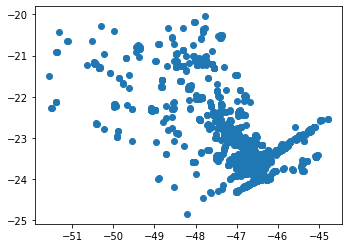

In [17]:
# mostrar os dados usando a função plot
gdf_roubos.plot()

# 3. Operação de interseção entre geometrias

Parece que já temos um esboço dos nosso dados. Vamos carregar o nosso gdf da capital de São Paulo e mostrar os dois dados em um só mapa.

In [18]:
# carregar os dados da capital de SP
filename = 'dados/capital_são_paulo.json'

gdf_capital_sp = gpd.read_file(filename, driver="GeoJSON")

<AxesSubplot:>

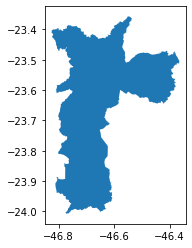

In [19]:
# mostrar os dados carregados com a função plot
gdf_capital_sp.plot()

Como podemos mostrar os dois conjuntos de dados em um mesmo mapa? Vamos usar o matplotlib!

In [20]:
# importar a biblioteca matplotlib
import matplotlib.pyplot as plt

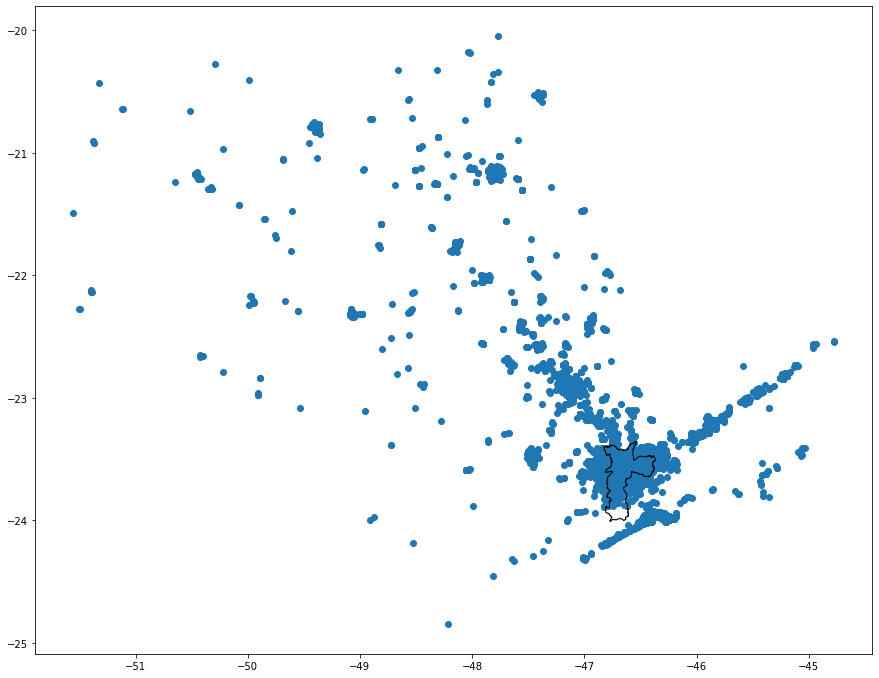

In [21]:
# mostrar os dados com matplotlib
fig, ax = plt.subplots(figsize=(15,15))

gdf_roubos.plot(ax=ax)
gdf_capital_sp.plot(ax=ax, facecolor='None', edgecolor='black')

plt.show()

De acordo com os nosso dados, realmente existe uma grande concentração dos nossos dados na região da capital, região metropolitana e na costa.

E para filtrar somente os dados registrados dentro da capital? Podemos fazer isso facilmente utilizando o nosso geodataframe.

In [22]:
# vamos primeiro pegar o polygon de são paulo
polygon_sp = gdf_capital_sp.iloc[0].geometry

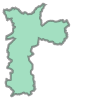

In [23]:
# mostrar o polygon no jupyter
polygon_sp

In [24]:
# fazer a operação de interseção entre as geometrias
gdf_roubos_capital = gdf_roubos[gdf_roubos.intersects(polygon_sp)]

Vamos mostrar novamente os dados em um mapa.

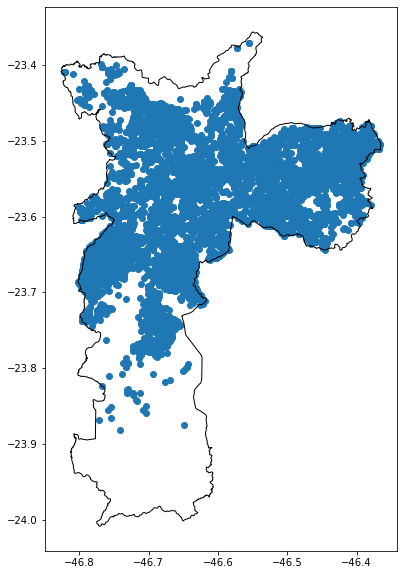

In [25]:
# mostrar os dados com matplotlib
fig, ax = plt.subplots(figsize=(10,10))

gdf_roubos_capital.plot(ax=ax)
gdf_capital_sp.plot(ax=ax, edgecolor='black', facecolor="None")

plt.show()

Agora vamos salvar os nossos dados para usar posteriormente.

In [26]:
# salvando os dados de roubo em sp
filename = "dados/roubo_celular_capital.json"

gdf_roubos_capital.to_file(filename, driver="GeoJSON")

Já temos os dados de São Paulo prontos para criar os nossos mapas interativos.

## Resumo

Nesta aula nós vimos como baixar dados georeferenciados e criar um geodataframe. Mais especificamente voce deve ter aprendido:
    
**1)** Baixar e analisar dados disponibilizados por um portal público;

**2)** Criar uma estrutura de dados GeoDataFrame;

**3)** Filtrar os dados contidos em uma geometria.